# World Ocean Atlas 2018 water mass definitions for Optimum Multi-Parameter Analysis
**The contents of this notebook will perform the following:**<br>
1) Subset temperature, salinity, oxygen, and density climatologies to relevant source water regions <br>
2) Calculate and save mean profiles for each of the parameters

### Imports

In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import glob
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.feature as cpf
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import seawater as sw
import cmocean.cm as cmo
import gsw


### Load data

In [2]:
temp_ds = xr.open_dataset('https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/woa/temperature/decav/1.00/woa18_decav_t00_01.nc', decode_times=False)
sal_ds  = xr.open_dataset('https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/woa/salinity/decav/1.00/woa18_decav_s00_01.nc', decode_times=False)
den_ds  = xr.open_dataset('https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/woa/density/decav/1.00/woa18_decav_I00_01.nc', decode_times=False)
oxy_ds  = xr.open_dataset('https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/woa/oxygen/all/1.00/woa18_all_o00_01.nc', decode_times=False)

In [3]:
den_ds

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 102, time: 1)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * depth               (depth) float32 0.0 5.0 10.0 ... 5.3e+03 5.4e+03 5.5e+03
  * time                (time) float32 4.326e+03
Dimensions without coordinates: nbounds
Data variables:
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    I_an                (time, depth, lat, lon) float32 ...
    I_mn                (time, depth, lat, lon) float32 ...
    I_dd                (time, depth, lat, lon) float64 ...
    I_sd                (time, depth, lat, lon) float32 ...
    I_se                (time, depth, lat, lon) float32 ...
    I_oa                (time, depth, lat, lon) float32 ...
    I_gp                (time, depth, lat, lon) float64 ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    title:                           World Ocean Atlas 2018 : sea_water_sigma...
    summary:                         Climatological mean density for the glob...
    references:                       Locarnini, R.A., T.P. Boyer, A.V. Misho...
    institution:                     NOAA National Center for Environmental I...
    comment:                         Global Climatology as part of the World ...
    ...                              ...
    ncei_template_version:           NCEI_NetCDF_Grid_Template_v1.0
    license:                         These data are openly available to the p...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    metadata_link:                   https://www.ncei.noaa.gov/products/world...
    date_created:                    2020-05-18 
    date_modified:                   2020-05-18

In [4]:
oxy_ds

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 102, time: 1)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * depth               (depth) float32 0.0 5.0 10.0 ... 5.3e+03 5.4e+03 5.5e+03
  * time                (time) float32 8.214e+03
Dimensions without coordinates: nbounds
Data variables:
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    o_an                (time, depth, lat, lon) float32 ...
    o_mn                (time, depth, lat, lon) float32 ...
    o_dd                (time, depth, lat, lon) float64 ...
    o_sd                (time, depth, lat, lon) float32 ...
    o_se                (time, depth, lat, lon) float32 ...
    o_oa                (time, depth, lat, lon) float32 ...
    o_gp                (time, depth, lat, lon) float64 ...
Attributes: (12/49)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           World Ocean Atlas 2018 : mole_concentrat...
    summary:                         Climatological mean dissolved oxygen for...
    references:                      Garcia, H. E., K. Weathers, C. R. Paver,...
    institution:                     National Centers for Environmental Infor...
    comment:                         global climatology as part of the World ...
    ...                              ...
    publisher_email:                 NCEI.info@noaa.gov
    nodc_template_version:           NODC_NetCDF_Grid_Template_v2.0
    license:                         These data are openly available to the p...
    metadata_link:                   https://www.nodc.noaa.gov/OC5/woa18/
    date_created:                    2019-07-29 
    date_modified:                   2019-07-29

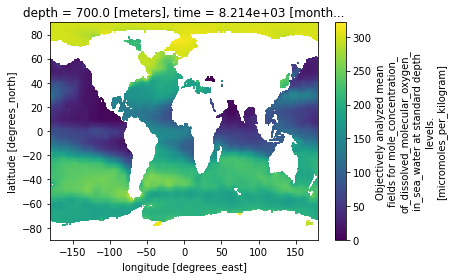

In [5]:
oxy_ds.o_an.sel(time=oxy_ds.time[0],depth=oxy_ds.depth[40]).plot()

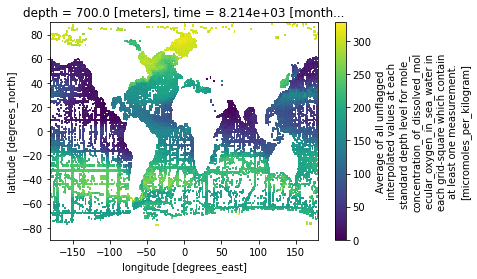

In [7]:
oxy_ds.o_mn.sel(time=oxy_ds.time[0],depth=oxy_ds.depth[40]).plot()

## East South Atlantic Central Water

In [8]:
min_lon = -10
max_lon = 15
min_lat = -15
max_lat = 0

## Subset
esaw_oxy_ds  = oxy_ds.sel(lat=slice(min_lat,max_lat),lon=slice(min_lon,max_lon),time=oxy_ds.time[0])
esaw_temp_ds = temp_ds.sel(lat=slice(min_lat,max_lat),lon=slice(min_lon,max_lon),time=temp_ds.time[0])
esaw_sal_ds  = sal_ds.sel(lat=slice(min_lat,max_lat),lon=slice(min_lon,max_lon),time=sal_ds.time[0])
esaw_den_ds  = den_ds.sel(lat=slice(min_lat,max_lat),lon=slice(min_lon,max_lon),time=sal_ds.time[0])

## Make average profiles
esaw_mean_oxy  = np.nanmean(esaw_oxy_ds.o_mn, axis=(1,2))
esaw_mean_temp = np.nanmean(esaw_temp_ds.t_mn, axis=(1,2))
esaw_mean_sal  = np.nanmean(esaw_sal_ds.s_mn, axis=(1,2))
esaw_mean_den  = np.nanmean(esaw_den_ds.I_mn, axis=(1,2))

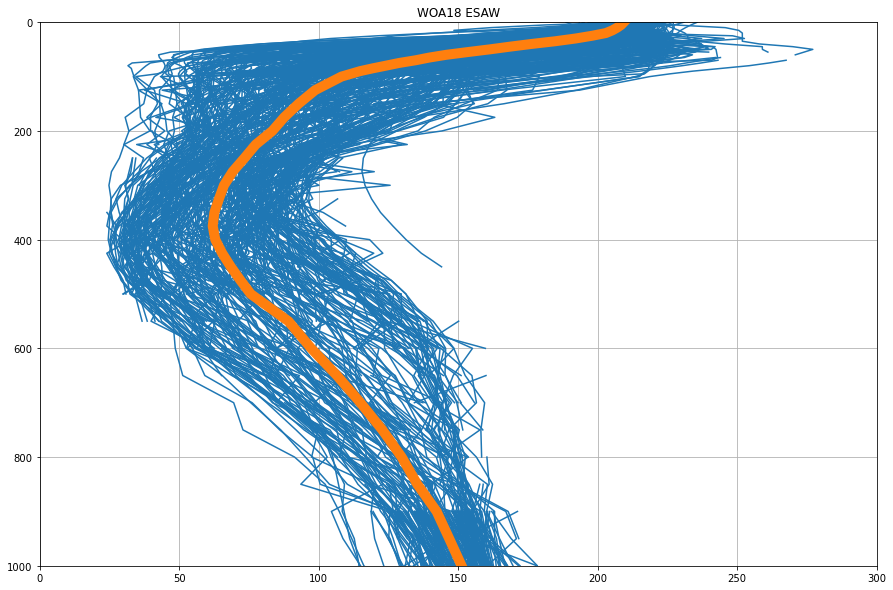

In [9]:
rows = esaw_oxy_ds.o_mn.shape[1]
cols = esaw_oxy_ds.o_mn.shape[2]

plt.figure(figsize=(15,10))
plt.ylim(1000,0)
plt.xlim(0,300)
plt.grid()
plt.title('WOA18 ESAW')

for x in np.arange(0,rows):
    for y in np.arange(0,cols):
        plt.plot(esaw_oxy_ds.o_mn[:,x,y],esaw_oxy_ds.depth,color='tab:blue')


plt.plot(esaw_mean_oxy,esaw_temp_ds.depth,color='tab:orange',linewidth=10)

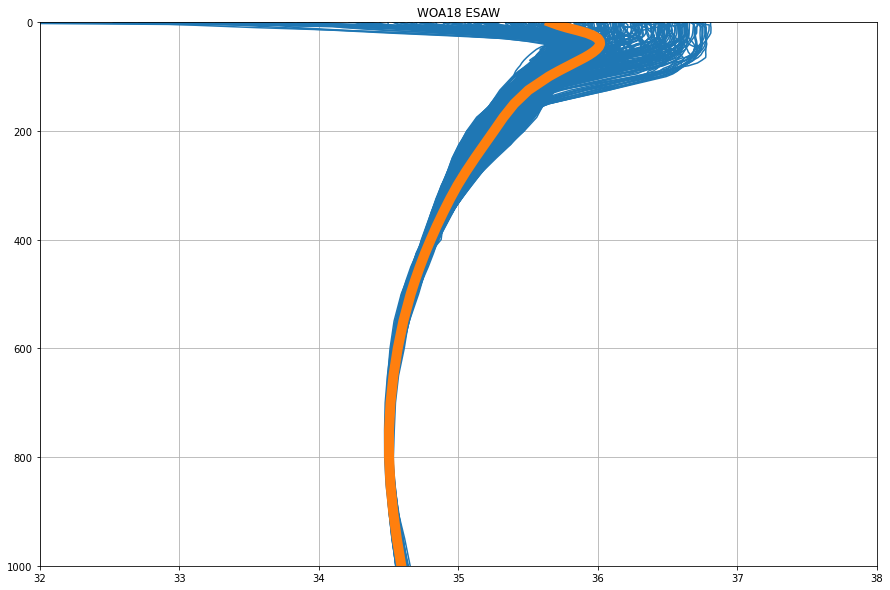

In [10]:
rows = esaw_oxy_ds.o_mn.shape[1]
cols = esaw_oxy_ds.o_mn.shape[2]

plt.figure(figsize=(15,10))
plt.ylim(1000,0)
plt.xlim(32,38)
plt.grid()
plt.title('WOA18 ESAW')

for x in np.arange(0,rows):
    for y in np.arange(0,cols):
        plt.plot(esaw_sal_ds.s_mn[:,x,y],esaw_sal_ds.depth,color='tab:blue')

plt.plot(esaw_mean_sal,esaw_sal_ds.depth,color='tab:orange',linewidth=10)

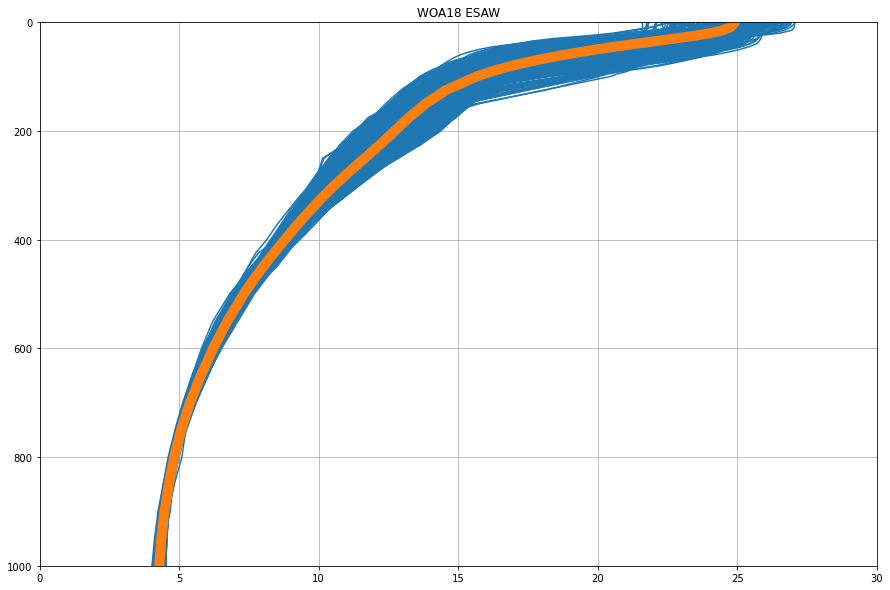

In [11]:
rows = esaw_temp_ds.t_mn.shape[1]
cols = esaw_temp_ds.t_mn.shape[2]

plt.figure(figsize=(15,10))
plt.ylim(1000,0)
plt.xlim(0,30)
plt.grid()
plt.title('WOA18 ESAW')

for x in np.arange(0,rows):
    for y in np.arange(0,cols):
        plt.plot(esaw_temp_ds.t_mn[:,x,y],esaw_temp_ds.depth,color='tab:blue')

plt.plot(esaw_mean_temp,esaw_temp_ds.depth,color='tab:orange',linewidth=10)

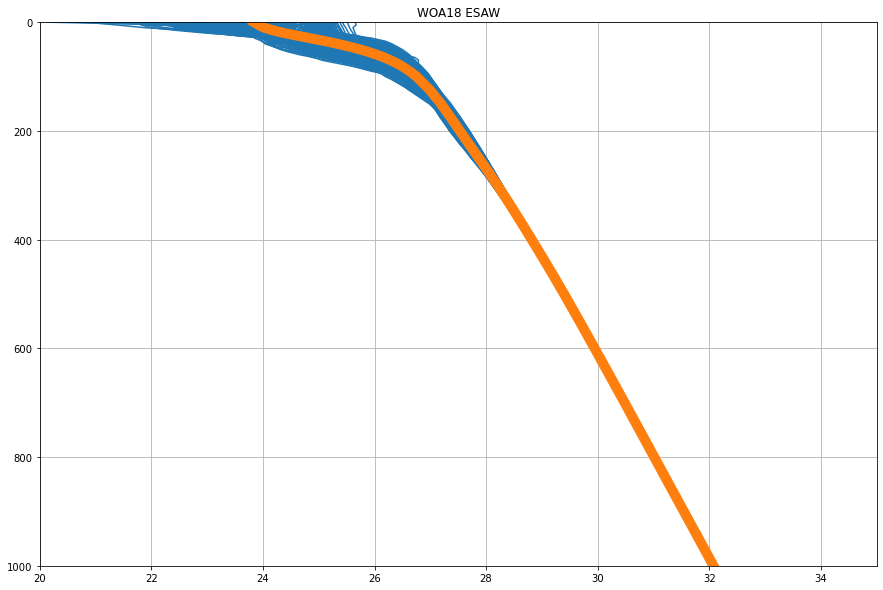

In [12]:


rows = esaw_den_ds.I_mn.shape[1]
cols = esaw_den_ds.I_mn.shape[2]

plt.figure(figsize=(15,10))
plt.ylim(1000,0)
plt.xlim(20,35)
plt.grid()
plt.title('WOA18 ESAW')

for x in np.arange(0,rows):
    for y in np.arange(0,cols):
        plt.plot(esaw_den_ds.I_mn[:,x,y],esaw_den_ds.depth,color='tab:blue')


plt.plot(esaw_mean_den,esaw_den_ds.depth,color='tab:orange',linewidth=10)

## West South Atlantic Water

In [13]:
min_lon = -50
max_lon = -25
min_lat = -40
max_lat = -20

## subset
wsaw_oxy_ds  = oxy_ds.sel(lat=slice(min_lat,max_lat),lon=slice(min_lon,max_lon),time=oxy_ds.time[0])
wsaw_temp_ds = temp_ds.sel(lat=slice(min_lat,max_lat),lon=slice(min_lon,max_lon),time=temp_ds.time[0])
wsaw_sal_ds  = sal_ds.sel(lat=slice(min_lat,max_lat),lon=slice(min_lon,max_lon),time=sal_ds.time[0])
wsaw_den_ds  = den_ds.sel(lat=slice(min_lat,max_lat),lon=slice(min_lon,max_lon),time=sal_ds.time[0])

## Make average profiles
wsaw_mean_oxy  = np.nanmean(wsaw_oxy_ds.o_mn, axis=(1,2))
wsaw_mean_temp = np.nanmean(wsaw_temp_ds.t_mn, axis=(1,2))
wsaw_mean_sal  = np.nanmean(wsaw_sal_ds.s_mn, axis=(1,2))
wsaw_mean_den  = np.nanmean(wsaw_den_ds.I_mn, axis=(1,2))

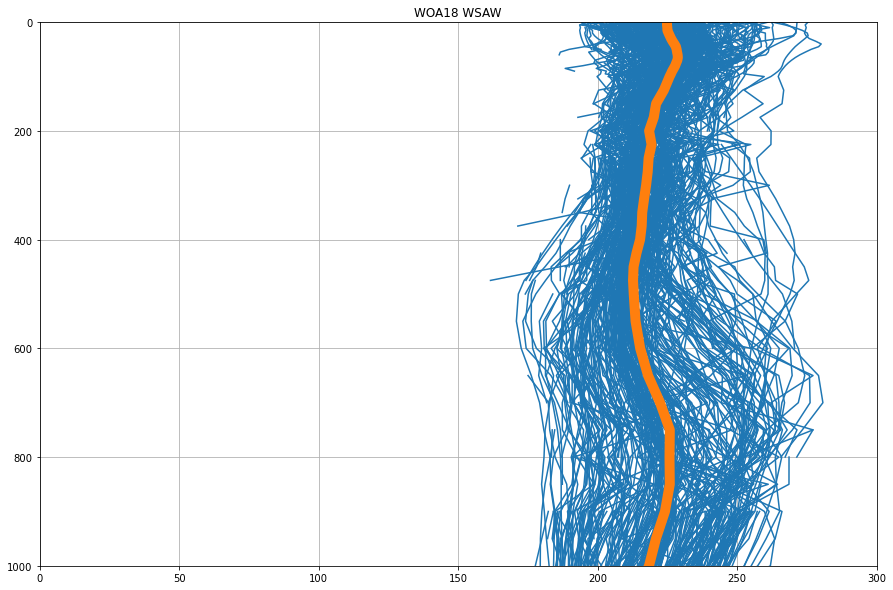

In [14]:
rows = wsaw_oxy_ds.o_mn.shape[1]
cols = wsaw_oxy_ds.o_mn.shape[2]

plt.figure(figsize=(15,10))
plt.ylim(1000,0)
plt.xlim(0,300)
plt.grid()
plt.title('WOA18 WSAW')

for x in np.arange(0,rows):
    for y in np.arange(0,cols):
        plt.plot(wsaw_oxy_ds.o_mn[:,x,y],wsaw_oxy_ds.depth,color='tab:blue')

plt.plot(wsaw_mean_oxy,wsaw_oxy_ds.depth,color='tab:orange',linewidth=10)

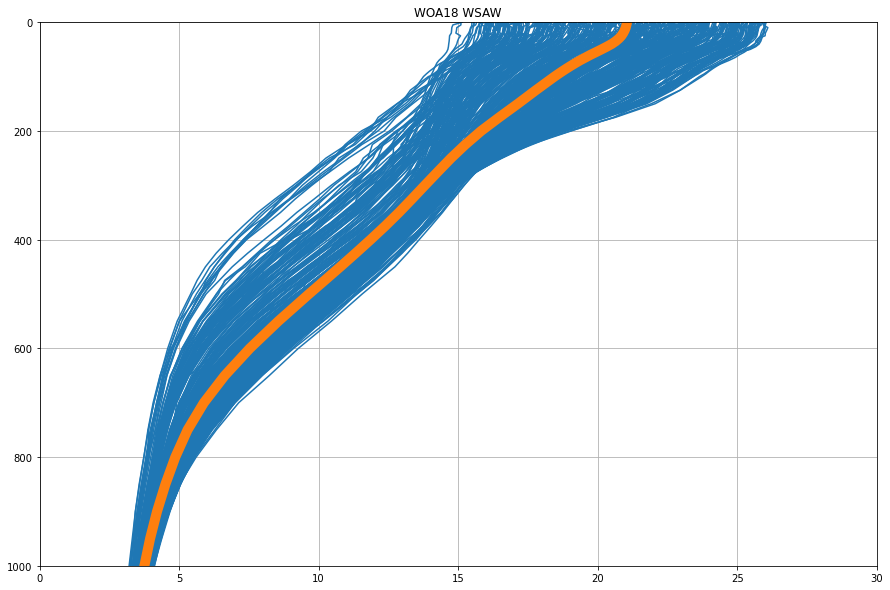

In [15]:
rows = wsaw_temp_ds.t_mn.shape[1]
cols = wsaw_temp_ds.t_mn.shape[2]

plt.figure(figsize=(15,10))
plt.ylim(1000,0)
plt.xlim(0,30)
plt.grid()
plt.title('WOA18 WSAW')

for x in np.arange(0,rows):
    for y in np.arange(0,cols):
        plt.plot(wsaw_temp_ds.t_mn[:,x,y],wsaw_temp_ds.depth,color='tab:blue')

plt.plot(wsaw_mean_temp,wsaw_temp_ds.depth,color='tab:orange',linewidth=10)

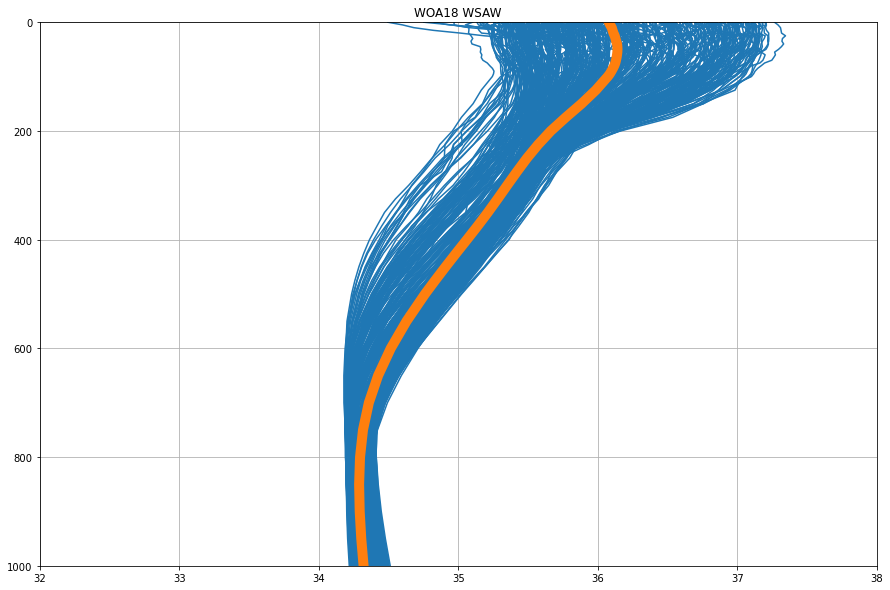

In [16]:
rows = wsaw_oxy_ds.o_mn.shape[1]
cols = wsaw_oxy_ds.o_mn.shape[2]

plt.figure(figsize=(15,10))
plt.ylim(1000,0)
plt.xlim(32,38)
plt.grid()
plt.title('WOA18 WSAW')

for x in np.arange(0,rows):
    for y in np.arange(0,cols):
        plt.plot(wsaw_sal_ds.s_mn[:,x,y],wsaw_sal_ds.depth,color='tab:blue')

plt.plot(wsaw_mean_sal,wsaw_temp_ds.depth,color='tab:orange',linewidth=10)

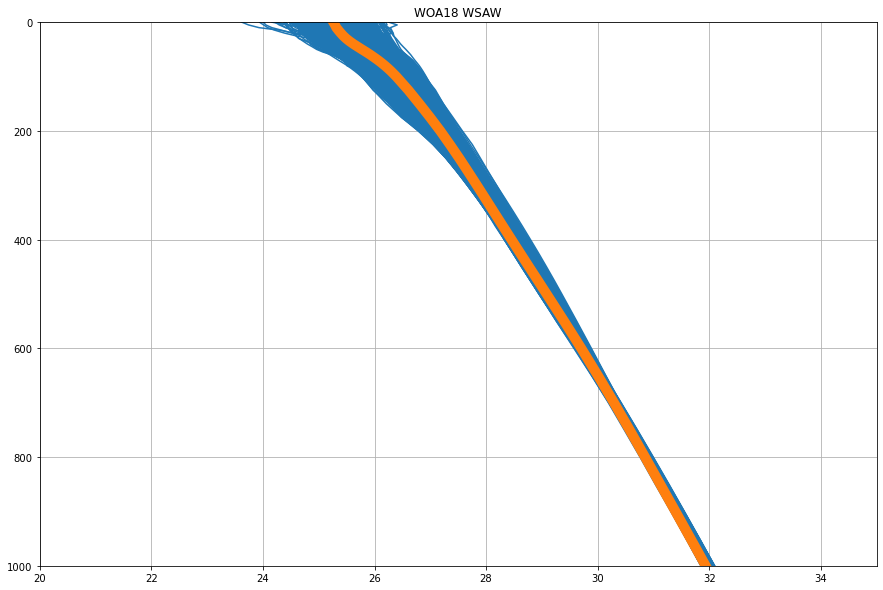

In [17]:
rows = wsaw_den_ds.I_mn.shape[1]
cols = wsaw_den_ds.I_mn.shape[2]

plt.figure(figsize=(15,10))
plt.ylim(1000,0)
plt.xlim(20,35)
plt.grid()
plt.title('WOA18 WSAW')

for x in np.arange(0,rows):
    for y in np.arange(0,cols):
        plt.plot(wsaw_den_ds.I_mn[:,x,y],wsaw_den_ds.depth,color='tab:blue')


plt.plot(wsaw_mean_den,wsaw_den_ds.depth,color='tab:orange',linewidth=10)

## North Atlantic Water

In [18]:
### NAW ###
min_lon = -70
max_lon = -35
min_lat = 25    #### should we do 25 instead, right?
max_lat = 40

## subset
naw_oxy_ds  = oxy_ds.sel(lat=slice(min_lat,max_lat),lon=slice(min_lon,max_lon),time=oxy_ds.time[0])
naw_temp_ds = temp_ds.sel(lat=slice(min_lat,max_lat),lon=slice(min_lon,max_lon),time=temp_ds.time[0])
naw_sal_ds  = sal_ds.sel(lat=slice(min_lat,max_lat),lon=slice(min_lon,max_lon),time=sal_ds.time[0])
naw_den_ds  = den_ds.sel(lat=slice(min_lat,max_lat),lon=slice(min_lon,max_lon),time=sal_ds.time[0])

## average profile
naw_mean_oxy  = np.nanmean(naw_oxy_ds.o_mn, axis=(1,2))
naw_mean_temp = np.nanmean(naw_temp_ds.t_mn, axis=(1,2))
naw_mean_sal  = np.nanmean(naw_sal_ds.s_mn, axis=(1,2))
naw_mean_den  = np.nanmean(naw_den_ds.I_mn, axis=(1,2))


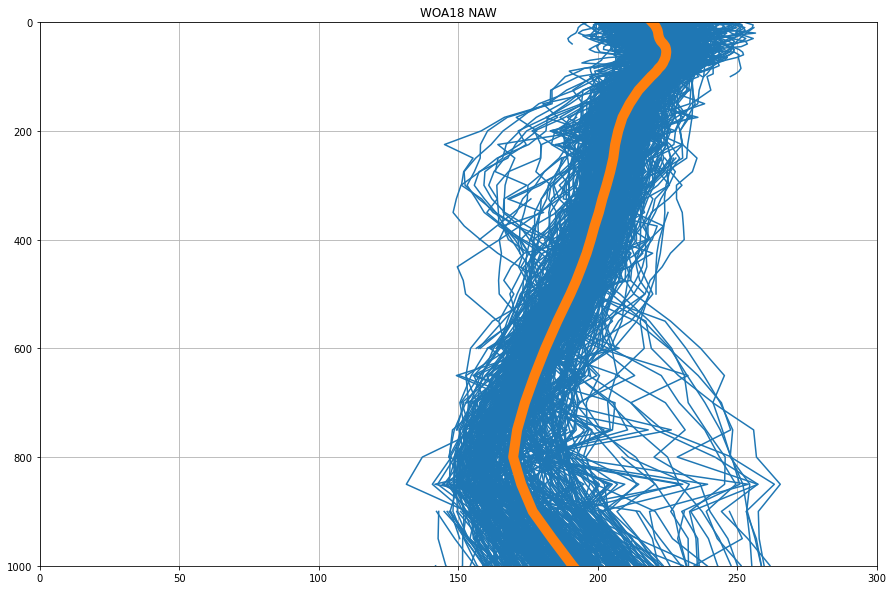

In [19]:
rows = naw_oxy_ds.o_mn.shape[1]
cols = naw_oxy_ds.o_mn.shape[2]

plt.figure(figsize=(15,10))
plt.ylim(1000,0)
plt.xlim(0,300)
plt.grid()
plt.title('WOA18 NAW')

for x in np.arange(0,rows):
    for y in np.arange(0,cols):
        plt.plot(naw_oxy_ds.o_mn[:,x,y],naw_oxy_ds.depth,color='tab:blue')

plt.plot(naw_mean_oxy,naw_oxy_ds.depth,color='tab:orange',linewidth=10)

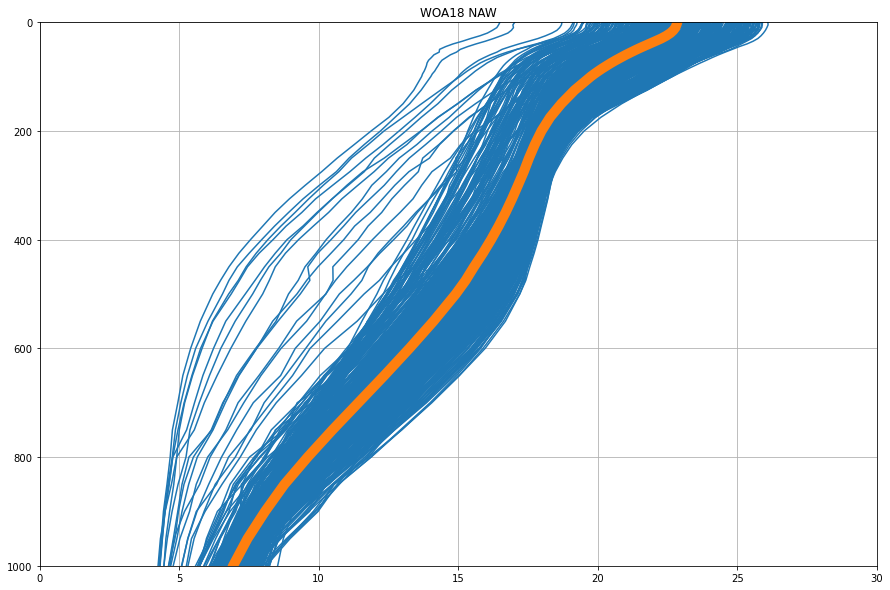

In [20]:
rows = naw_temp_ds.t_mn.shape[1]
cols = naw_temp_ds.t_mn.shape[2]

plt.figure(figsize=(15,10))
plt.ylim(1000,0)
plt.xlim(0,30)
plt.grid()
plt.title('WOA18 NAW')

for x in np.arange(0,rows):
    for y in np.arange(0,cols):
        plt.plot(naw_temp_ds.t_mn[:,x,y],naw_temp_ds.depth,color='tab:blue')

plt.plot(naw_mean_temp,naw_temp_ds.depth,color='tab:orange',linewidth=10)

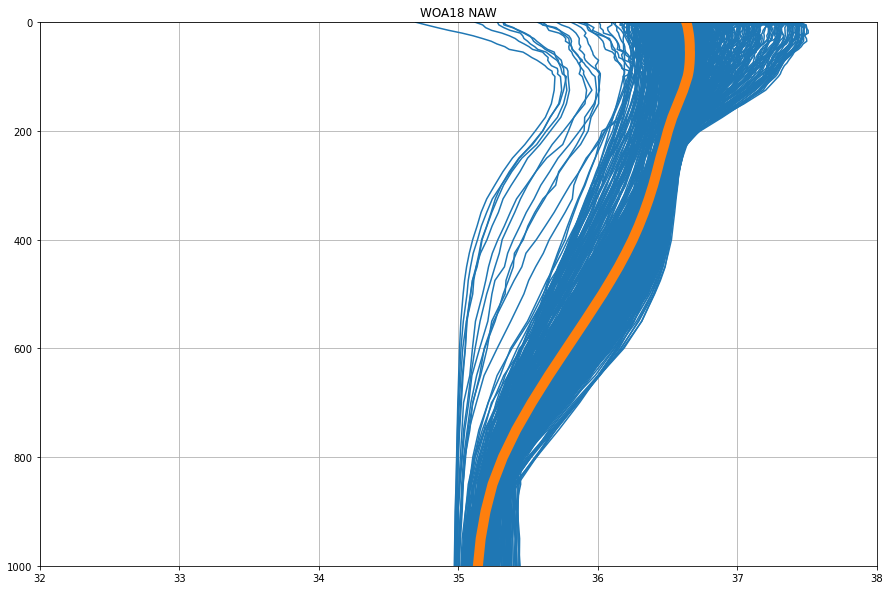

In [21]:
rows = naw_sal_ds.s_mn.shape[1]
cols = naw_sal_ds.s_mn.shape[2]

plt.figure(figsize=(15,10))
plt.ylim(1000,0)
plt.xlim(32,38)
plt.grid()
plt.title('WOA18 NAW')

for x in np.arange(0,rows):
    for y in np.arange(0,cols):
        plt.plot(naw_sal_ds.s_mn[:,x,y],naw_sal_ds.depth,color='tab:blue')

plt.plot(naw_mean_sal,naw_sal_ds.depth,color='tab:orange',linewidth=10)

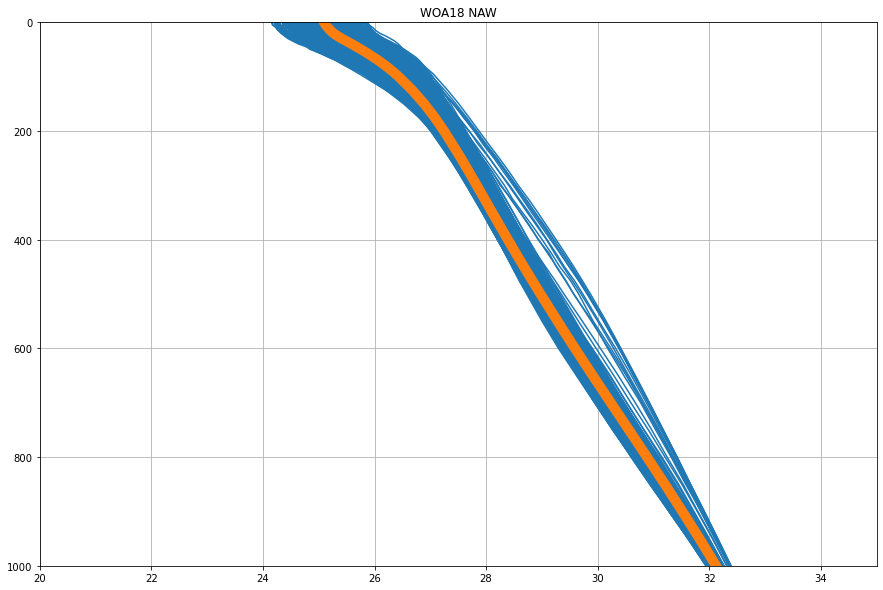

In [22]:
rows = naw_den_ds.I_mn.shape[1]
cols = naw_den_ds.I_mn.shape[2]

plt.figure(figsize=(15,10))
plt.ylim(1000,0)
plt.xlim(20,35)
plt.grid()
plt.title('WOA18 NAW')

for x in np.arange(0,rows):
    for y in np.arange(0,cols):
        plt.plot(naw_den_ds.I_mn[:,x,y],naw_den_ds.depth,color='tab:blue')


plt.plot(naw_mean_den,naw_den_ds.depth,color='tab:orange',linewidth=10)

## ENAW Ox Min

In [23]:
### ENAW Ox Min ###
min_lon = -27
max_lon = -17
min_lat = 7
max_lat = 22

## Subset
enaw_oxy_ds  = oxy_ds.sel(lat=slice(min_lat,max_lat),lon=slice(min_lon,max_lon),time=oxy_ds.time[0])
enaw_temp_ds = temp_ds.sel(lat=slice(min_lat,max_lat),lon=slice(min_lon,max_lon),time=temp_ds.time[0])
enaw_sal_ds  = sal_ds.sel(lat=slice(min_lat,max_lat),lon=slice(min_lon,max_lon),time=sal_ds.time[0])
enaw_den_ds  = den_ds.sel(lat=slice(min_lat,max_lat),lon=slice(min_lon,max_lon),time=sal_ds.time[0])

## Make average profiles
enaw_mean_oxy  = np.nanmean(enaw_oxy_ds.o_mn, axis=(1,2))
enaw_mean_temp = np.nanmean(enaw_temp_ds.t_mn, axis=(1,2))
enaw_mean_sal  = np.nanmean(enaw_sal_ds.s_mn, axis=(1,2))
enaw_mean_den  = np.nanmean(enaw_den_ds.I_mn, axis=(1,2))

/Users/joegradone/opt/anaconda3/envs/glider/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  
/Users/joegradone/opt/anaconda3/envs/glider/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app
/Users/joegradone/opt/anaconda3/envs/glider/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()
/Users/joegradone/opt/anaconda3/envs/glider/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: Mean of empty slice


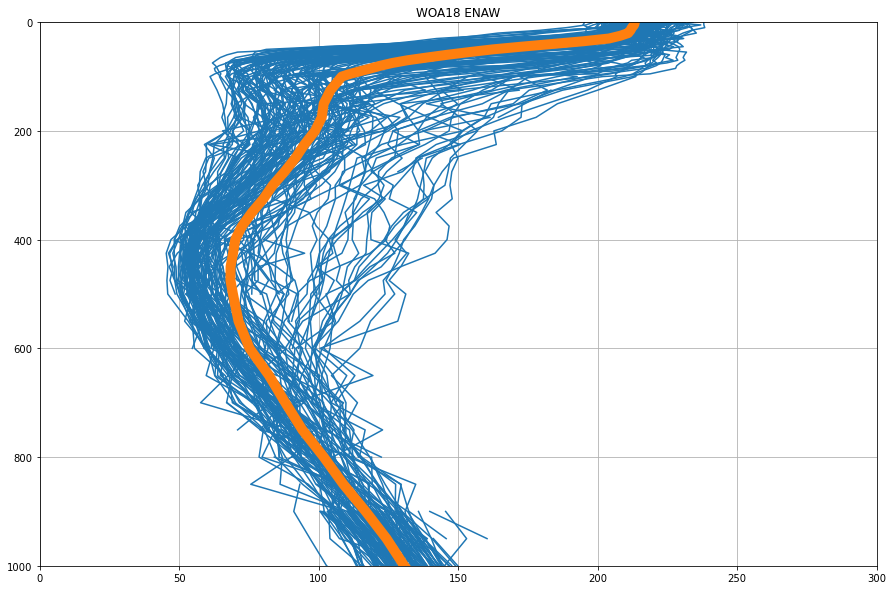

In [24]:
rows = enaw_oxy_ds.o_mn.shape[1]
cols = enaw_oxy_ds.o_mn.shape[2]

plt.figure(figsize=(15,10))
plt.ylim(1000,0)
plt.xlim(0,300)
plt.grid()
plt.title('WOA18 ENAW')

for x in np.arange(0,rows):
    for y in np.arange(0,cols):
        plt.plot(enaw_oxy_ds.o_mn[:,x,y],enaw_oxy_ds.depth,color='tab:blue')


plt.plot(enaw_mean_oxy,enaw_oxy_ds.depth,color='tab:orange',linewidth=10)

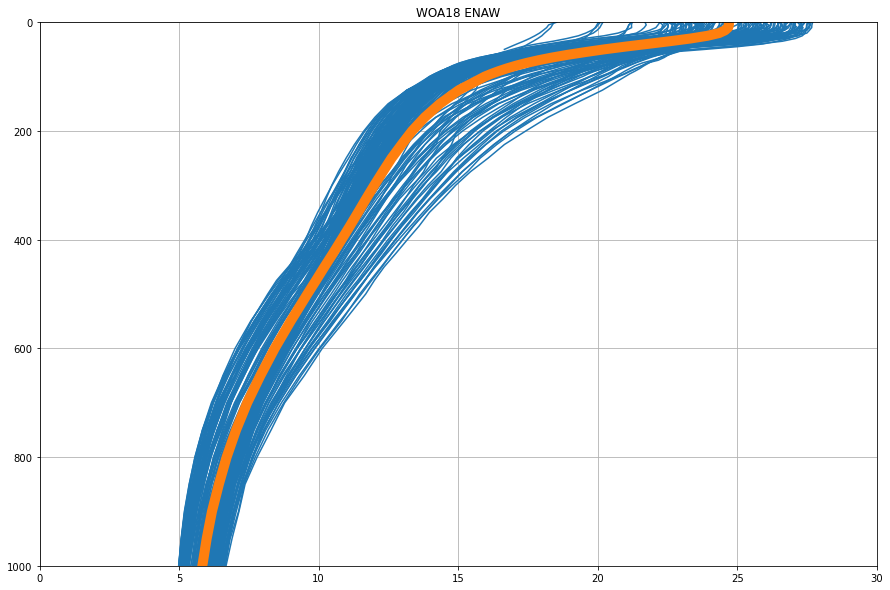

In [25]:
rows = enaw_temp_ds.t_mn.shape[1]
cols = enaw_temp_ds.t_mn.shape[2]

plt.figure(figsize=(15,10))
plt.ylim(1000,0)
plt.xlim(0,30)
plt.grid()
plt.title('WOA18 ENAW')

for x in np.arange(0,rows):
    for y in np.arange(0,cols):
        plt.plot(enaw_temp_ds.t_mn[:,x,y],enaw_temp_ds.depth,color='tab:blue')

plt.plot(enaw_mean_temp,enaw_temp_ds.depth,color='tab:orange',linewidth=10)

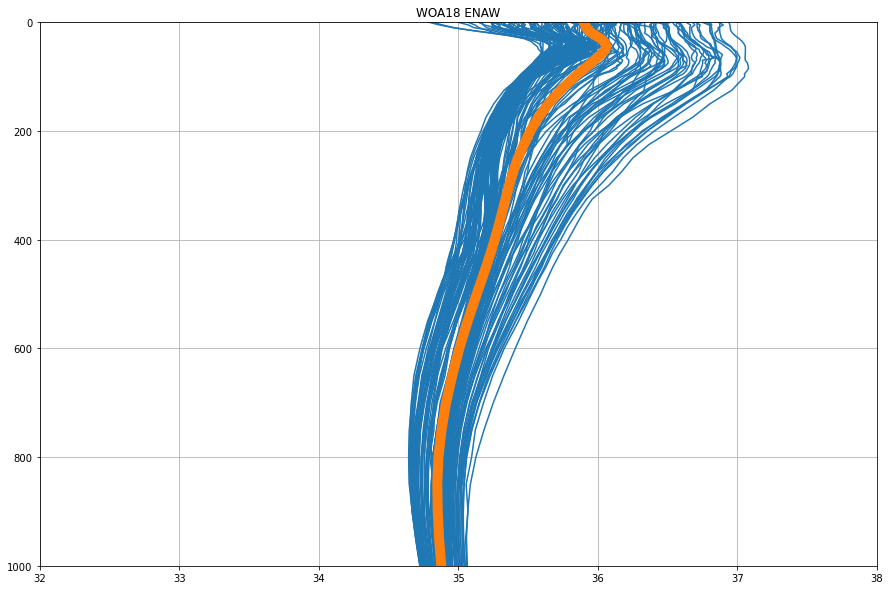

In [26]:
rows = enaw_sal_ds.s_mn.shape[1]
cols = enaw_sal_ds.s_mn.shape[2]

plt.figure(figsize=(15,10))
plt.ylim(1000,0)
plt.xlim(32,38)
plt.grid()
plt.title('WOA18 ENAW')

for x in np.arange(0,rows):
    for y in np.arange(0,cols):
        plt.plot(enaw_sal_ds.s_mn[:,x,y],enaw_sal_ds.depth,color='tab:blue')

plt.plot(enaw_mean_sal,enaw_sal_ds.depth,color='tab:orange',linewidth=10)

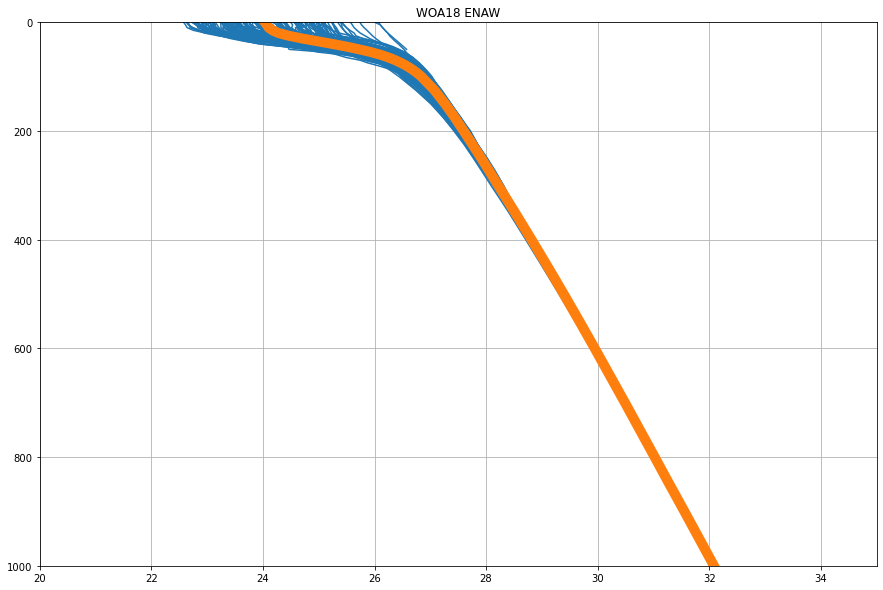

In [27]:
rows = enaw_den_ds.I_mn.shape[1]
cols = enaw_den_ds.I_mn.shape[2]

plt.figure(figsize=(15,10))
plt.ylim(1000,0)
plt.xlim(20,35)
plt.grid()
plt.title('WOA18 ENAW')

for x in np.arange(0,rows):
    for y in np.arange(0,cols):
        plt.plot(enaw_den_ds.I_mn[:,x,y],enaw_den_ds.depth,color='tab:blue')


plt.plot(enaw_mean_den,enaw_den_ds.depth,color='tab:orange',linewidth=10)

## ESAW2

In [28]:
### ESAW2 ###
min_lon = -10
max_lon = 15
min_lat = -40
max_lat = -21

## Subset
esaw2_oxy_ds  = oxy_ds.sel(lat=slice(min_lat,max_lat),lon=slice(min_lon,max_lon),time=oxy_ds.time[0])
esaw2_temp_ds = temp_ds.sel(lat=slice(min_lat,max_lat),lon=slice(min_lon,max_lon),time=temp_ds.time[0])
esaw2_sal_ds  = sal_ds.sel(lat=slice(min_lat,max_lat),lon=slice(min_lon,max_lon),time=sal_ds.time[0])
esaw2_den_ds  = den_ds.sel(lat=slice(min_lat,max_lat),lon=slice(min_lon,max_lon),time=sal_ds.time[0])

## Make average profiles
esaw2_mean_oxy  = np.nanmean(esaw2_oxy_ds.o_mn, axis=(1,2))
esaw2_mean_temp = np.nanmean(esaw2_temp_ds.t_mn, axis=(1,2))
esaw2_mean_sal  = np.nanmean(esaw2_sal_ds.s_mn, axis=(1,2))
esaw2_mean_den  = np.nanmean(esaw2_den_ds.I_mn, axis=(1,2))

/Users/joegradone/opt/anaconda3/envs/glider/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  
/Users/joegradone/opt/anaconda3/envs/glider/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app
/Users/joegradone/opt/anaconda3/envs/glider/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()
/Users/joegradone/opt/anaconda3/envs/glider/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: Mean of empty slice


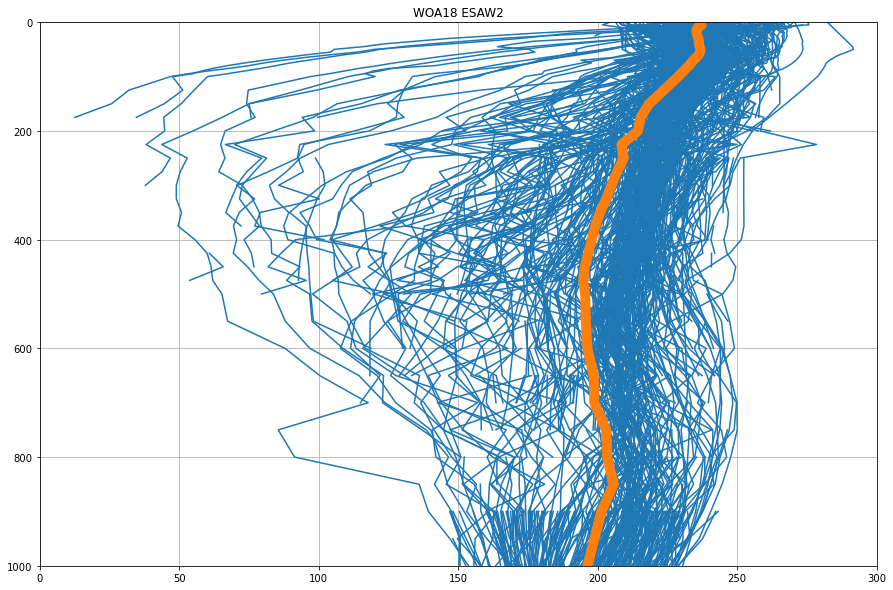

In [29]:
rows = esaw2_oxy_ds.o_mn.shape[1]
cols = esaw2_oxy_ds.o_mn.shape[2]

plt.figure(figsize=(15,10))
plt.ylim(1000,0)
plt.xlim(0,300)
plt.grid()
plt.title('WOA18 ESAW2')

for x in np.arange(0,rows):
    for y in np.arange(0,cols):
        plt.plot(esaw2_oxy_ds.o_mn[:,x,y],esaw2_oxy_ds.depth,color='tab:blue')


plt.plot(esaw2_mean_oxy,esaw2_temp_ds.depth,color='tab:orange',linewidth=10)

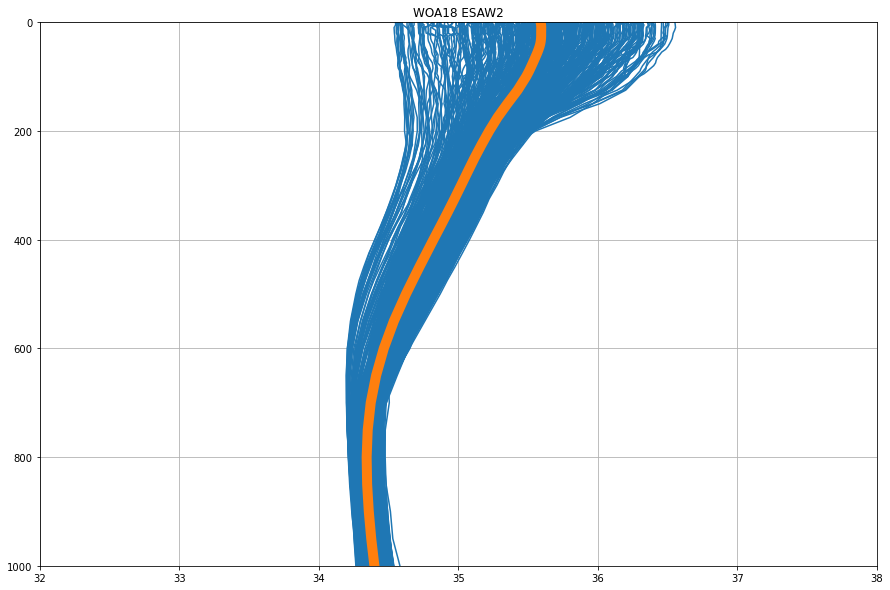

In [30]:
rows = esaw2_oxy_ds.o_mn.shape[1]
cols = esaw2_oxy_ds.o_mn.shape[2]

plt.figure(figsize=(15,10))
plt.ylim(1000,0)
plt.xlim(32,38)
plt.grid()
plt.title('WOA18 ESAW2')

for x in np.arange(0,rows):
    for y in np.arange(0,cols):
        plt.plot(esaw2_sal_ds.s_mn[:,x,y],esaw2_sal_ds.depth,color='tab:blue')

plt.plot(esaw2_mean_sal,esaw2_sal_ds.depth,color='tab:orange',linewidth=10)

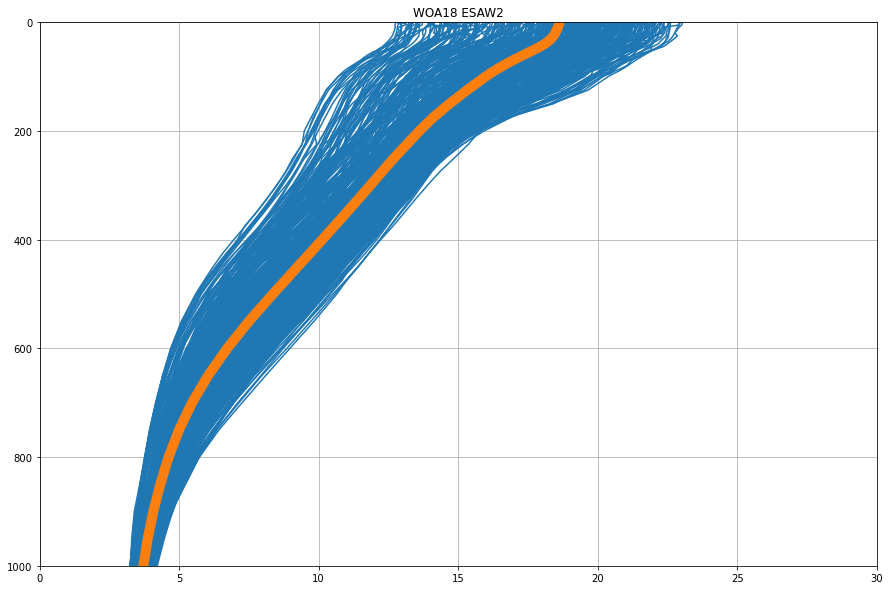

In [31]:
rows = esaw2_temp_ds.t_mn.shape[1]
cols = esaw2_temp_ds.t_mn.shape[2]

plt.figure(figsize=(15,10))
plt.ylim(1000,0)
plt.xlim(0,30)
plt.grid()
plt.title('WOA18 ESAW2')

for x in np.arange(0,rows):
    for y in np.arange(0,cols):
        plt.plot(esaw2_temp_ds.t_mn[:,x,y],esaw2_temp_ds.depth,color='tab:blue')

plt.plot(esaw2_mean_temp,esaw2_temp_ds.depth,color='tab:orange',linewidth=10)

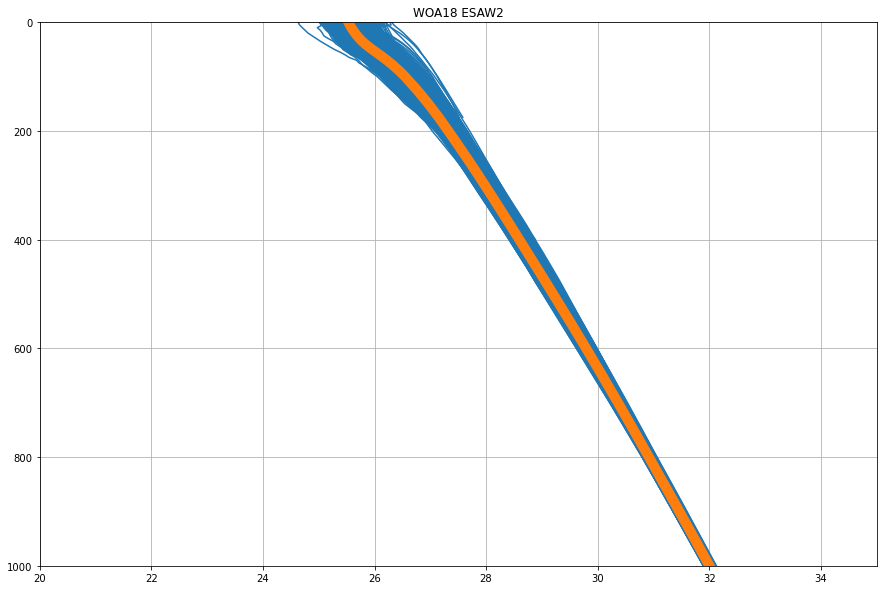

In [32]:
rows = esaw2_den_ds.I_mn.shape[1]
cols = esaw2_den_ds.I_mn.shape[2]

plt.figure(figsize=(15,10))
plt.ylim(1000,0)
plt.xlim(20,35)
plt.grid()
plt.title('WOA18 ESAW2')

for x in np.arange(0,rows):
    for y in np.arange(0,cols):
        plt.plot(esaw2_den_ds.I_mn[:,x,y],esaw2_den_ds.depth,color='tab:blue')


plt.plot(esaw2_mean_den,esaw2_den_ds.depth,color='tab:orange',linewidth=10)

# Plots of all of the mean profiles together

Text(0.5, 1.0, 'World Ocean Atlas 2018 \n Mean Profiles from Source Water Regions')

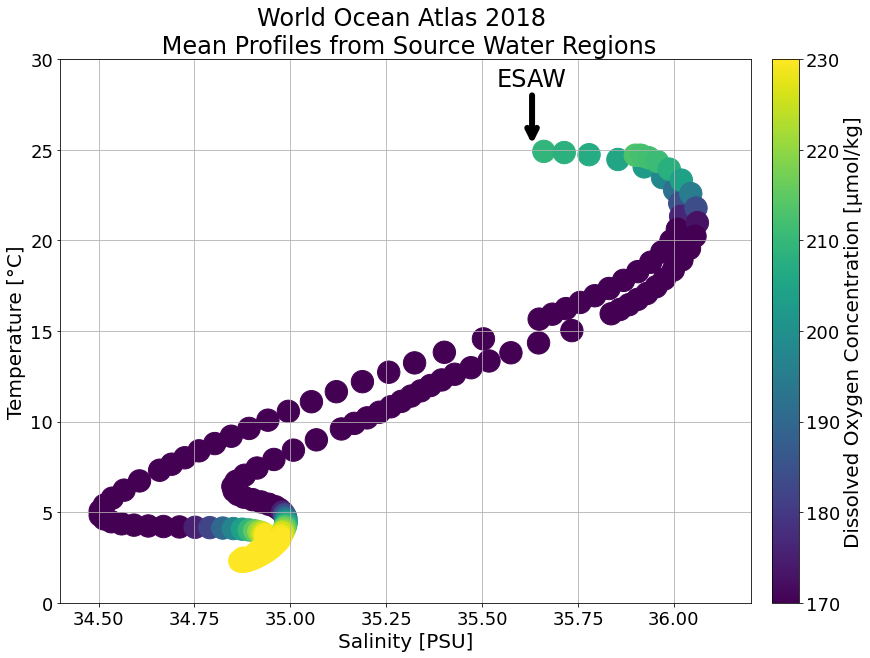

In [33]:
plt.figure(figsize=(15,10))

###### Scatter point settings
## color range
vmin=170
vmax=230
## markersize
s = 500

## ESAW
plt.scatter(esaw_mean_sal,esaw_mean_temp,c=esaw_mean_oxy,s=s,vmin=vmin,vmax=vmax)
plt.annotate(
'ESAW', xy=(35.63, 25.2),xytext=(35.63, 28.5) ,
size=24, horizontalalignment="center",
arrowprops=dict(arrowstyle='->',lw=6)
)

# ## WSAW
# plt.scatter(wsaw_mean_sal,wsaw_mean_temp,c=wsaw_mean_oxy,s=s,vmin=vmin,vmax=vmax)
# plt.annotate(
# 'WSAW', xy=(36.1, 21.5),xytext=(36.1, 24.8) ,
# size=24, horizontalalignment="center",
# arrowprops=dict(arrowstyle='->',lw=6)
# )

# ## NAW
# plt.scatter(naw_mean_sal,naw_mean_temp,c=naw_mean_oxy,s=s,vmin=vmin,vmax=vmax)
# plt.annotate(
# 'NAW', xy=(36.62, 23.5),xytext=(36.62, 26.8) ,
# size=24, horizontalalignment="center",
# arrowprops=dict(arrowstyle='->',lw=6)
# )


# # ESAW2
# plt.scatter(esaw2_mean_sal,esaw2_mean_temp,c=esaw2_mean_oxy,s=s,vmin=vmin,vmax=vmax)
# plt.annotate(
# 'ESAW2', xy=(35.58, 19.1),xytext=(35.58, 22.4) ,
# size=24, horizontalalignment="center",
# arrowprops=dict(arrowstyle='->',lw=6)
# )



# ENAW
plt.scatter(enaw_mean_sal,enaw_mean_temp,c=enaw_mean_oxy,s=s,vmin=vmin,vmax=vmax)
# plt.annotate(
# 'ESAW2', xy=(35.58, 19.1),xytext=(35.58, 22.4) ,
# size=24, horizontalalignment="center",
# arrowprops=dict(arrowstyle='->',lw=6)
# )


plt.gca().tick_params(axis='both', which='major', labelsize=18)
plt.gca().tick_params(axis='both', which='minor', labelsize=18)
plt.ylim(0,30)
#plt.xlim(34,37)
plt.xlim(34.4,36.2)

plt.xlabel('Salinity [PSU]', size=20)
plt.ylabel('Temperature [''\N{DEGREE SIGN}''C]', size=20)
cbar = plt.colorbar(pad=0.025)
cbar.set_label('Dissolved Oxygen Concentration ['u"\u03bc"'mol/kg]', size=20)
cbar.ax.tick_params(labelsize=18)
plt.grid()
plt.title('World Ocean Atlas 2018 \n Mean Profiles from Source Water Regions',size=24)

Text(0.5, 1.0, 'World Ocean Atlas 2018 \n Mean Profiles from Source Water Regions')

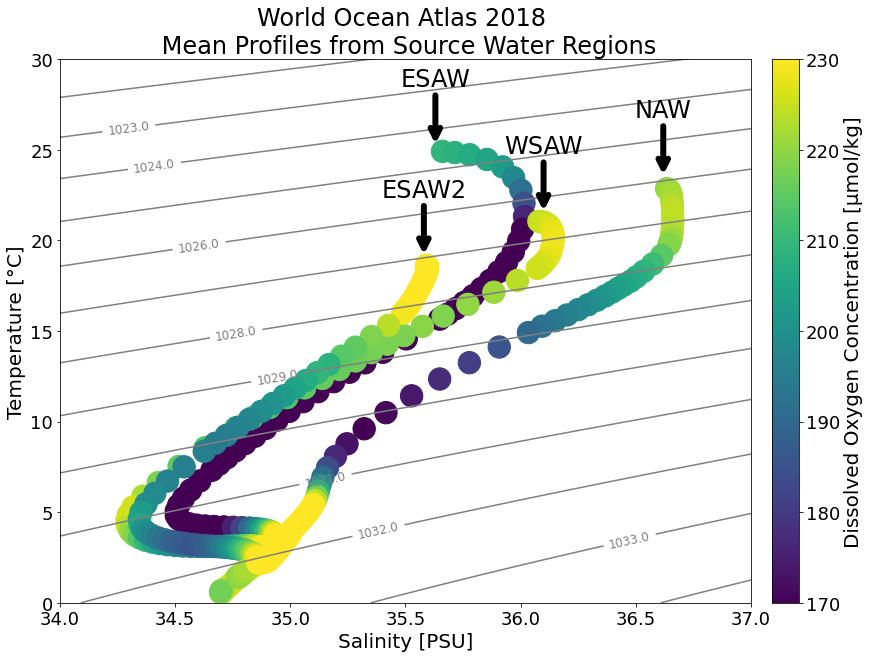

In [34]:
plt.figure(figsize=(15,10))

###### Scatter point settings
## color range
vmin=170
vmax=230
## markersize
s = 500

## ESAW
plt.scatter(esaw_mean_sal,esaw_mean_temp,c=esaw_mean_oxy,s=s,vmin=vmin,vmax=vmax)
plt.annotate(
'ESAW', xy=(35.63, 25.2),xytext=(35.63, 28.5) ,
size=24, horizontalalignment="center",
arrowprops=dict(arrowstyle='->',lw=6)
)

## WSAW
plt.scatter(wsaw_mean_sal,wsaw_mean_temp,c=wsaw_mean_oxy,s=s,vmin=vmin,vmax=vmax)
plt.annotate(
'WSAW', xy=(36.1, 21.5),xytext=(36.1, 24.8) ,
size=24, horizontalalignment="center",
arrowprops=dict(arrowstyle='->',lw=6)
)

## NAW
plt.scatter(naw_mean_sal,naw_mean_temp,c=naw_mean_oxy,s=s,vmin=vmin,vmax=vmax)
plt.annotate(
'NAW', xy=(36.62, 23.5),xytext=(36.62, 26.8) ,
size=24, horizontalalignment="center",
arrowprops=dict(arrowstyle='->',lw=6)
)


# ESAW2
plt.scatter(esaw2_mean_sal,esaw2_mean_temp,c=esaw2_mean_oxy,s=s,vmin=vmin,vmax=vmax)
plt.annotate(
'ESAW2', xy=(35.58, 19.1),xytext=(35.58, 22.4) ,
size=24, horizontalalignment="center",
arrowprops=dict(arrowstyle='->',lw=6)
)


plt.gca().tick_params(axis='both', which='major', labelsize=18)
plt.gca().tick_params(axis='both', which='minor', labelsize=18)
plt.ylim(0,30)
plt.xlim(34,37)
plt.xlabel('Salinity [PSU]', size=20)
plt.ylabel('Temperature [''\N{DEGREE SIGN}''C]', size=20)
cbar = plt.colorbar(pad=0.025)
cbar.set_label('Dissolved Oxygen Concentration ['u"\u03bc"'mol/kg]', size=20)
cbar.ax.tick_params(labelsize=18)

######## This plots the contours
mint=1
maxt=30
mins=34
maxs=37
tempL=np.linspace(mint-1,maxt+1,399)
salL=np.linspace(mins-1,maxs+1,399)
Tg, Sg = np.meshgrid(tempL,salL)


z=np.linspace(-1000,0,399)
p = gsw.p_from_z(z,lat=0)
sigma_theta = gsw.density.rho(Sg, Tg, p)

#sigma_theta = gsw.sigma0(Sg, Tg)+1000 # ignore effects of pressure on density
cnt = np.linspace(sigma_theta.min(), sigma_theta.max(),399)
ind = np.argwhere(sigma_theta > 1015.7)
st_short = sigma_theta[ind]
#cs = plt.contour(Sg, Tg, sigma_theta, colors='grey', zorder=1 ,levels=np.arange(1020, 1030,1), vmin = 1020, vmax = 1030)
cs = plt.contour(Sg, Tg, sigma_theta, colors='grey', zorder=1 ,levels=np.arange(1020, 1037,1), vmin = 1020, vmax = 1037)
levels = cs.levels
manual_locations = [(34.3, 26), (34.4, 25), (34.6,20), (34.75,16), (34.95,12), (35.15,7), (35.4,3), (36.5,2)]
plt.clabel(cs,levels, fontsize=12,inline=True,fmt='%.1f', manual=manual_locations)

plt.title('World Ocean Atlas 2018 \n Mean Profiles from Source Water Regions',size=24)

In [35]:
z=np.linspace(-1000,0,399)
p = gsw.p_from_z(z,lat=0)
rho = gsw.density.rho(Sg, Tg, p)
rho

array([[1031.13515756, 1031.11717645, 1031.09913076, ..., 1019.88117413,
        1019.84384628, 1019.80647987],
       [1031.14512835, 1031.12714455, 1031.10909616, ..., 1019.89033421,
        1019.85300479, 1019.81563681],
       [1031.15509917, 1031.13711267, 1031.11906159, ..., 1019.89949432,
        1019.86216333, 1019.82479379],
       ...,
       [1035.08456631, 1035.06552607, 1035.04642244, ..., 1023.51110684,
        1023.47315791, 1023.43517071],
       [1035.09454191, 1035.07549901, 1035.05639273, ..., 1023.52027976,
        1023.48232926, 1023.44434049],
       [1035.10451751, 1035.08547196, 1035.06636303, ..., 1023.52945272,
        1023.49150064, 1023.4535103 ]])

## Quick map of where the bounding boxes for the water mass formation regions are


No handles with labels found to put in legend.


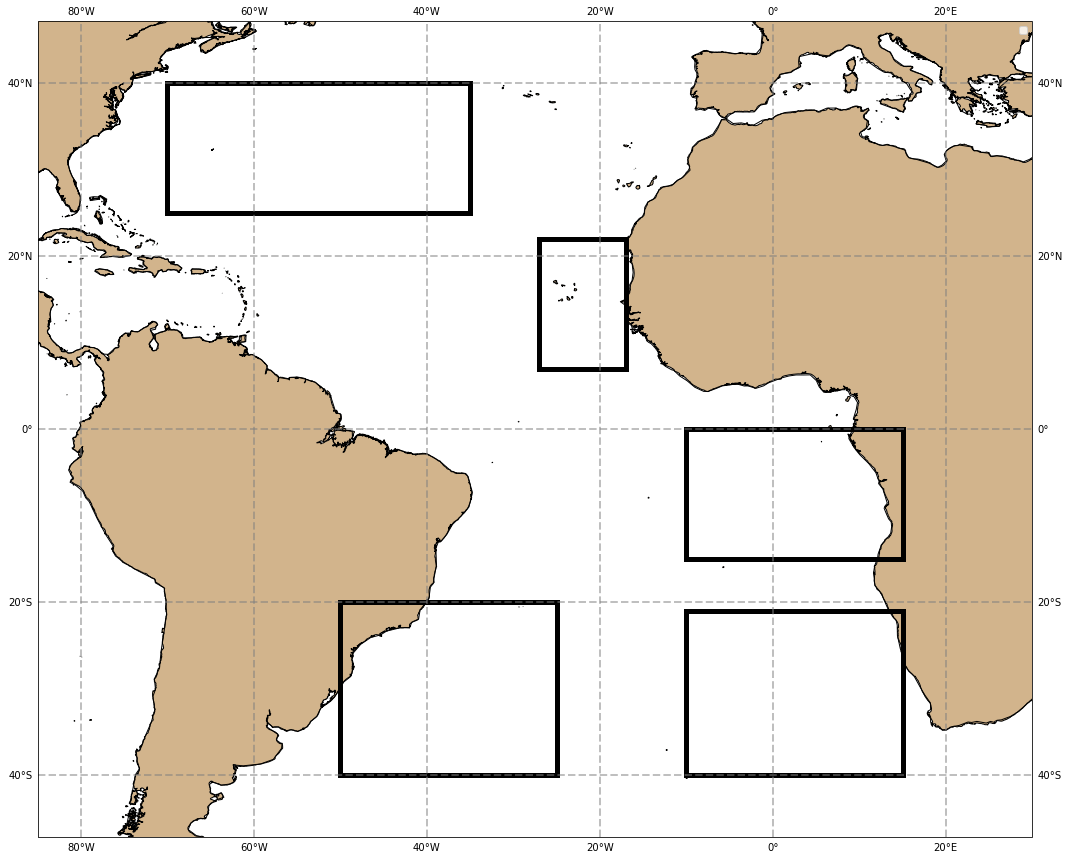

In [36]:


## Map extent
lon1 = -85
lon2 = 30
lat1 = -30
lat2 = 30

fig = plt.figure(figsize=(30,15))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([lon1, lon2, lat1, lat2])
LAND = cfeature.NaturalEarthFeature(
    'physical', 'land', '10m',
    edgecolor='black',
    facecolor='tan'
)
ax.add_feature(LAND, zorder=0)

#plt.plot(subset_df.longitude.values,subset_df.latitude.values,'.',markersize=1)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')



def plot_rectangle_on_map(min_lon,max_lon,min_lat,max_lat):
    width = np.abs(min_lon-max_lon)
    height = np.abs(max_lat-min_lat)
    ax.add_patch(mpatches.Rectangle(xy=[min_lon, min_lat], width=width, height=height,
                                    facecolor='None',
                                    edgecolor='black',
                                    linewidth=5,
                                    transform=ccrs.PlateCarree()))

### WSAW ###
min_lon = -50
max_lon = -25
min_lat = -40
max_lat = -20
plot_rectangle_on_map(min_lon,max_lon,min_lat,max_lat)

### ESAW ###
min_lon = -10
max_lon = 15
min_lat = -15
max_lat = 0
plot_rectangle_on_map(min_lon,max_lon,min_lat,max_lat)
plt.legend()

### NAW ###
min_lon = -70
max_lon = -35
min_lat = 25
max_lat = 40
plot_rectangle_on_map(min_lon,max_lon,min_lat,max_lat)


### ESAW2 ###
min_lon = -10
max_lon = 15
min_lat = -40
max_lat = -21
plot_rectangle_on_map(min_lon,max_lon,min_lat,max_lat)



### NEAW Ox Min ###
min_lon = -27
max_lon = -17
min_lat = 7
max_lat = 22
plot_rectangle_on_map(min_lon,max_lon,min_lat,max_lat)

## Defining water masses based on the WOA in-situ density

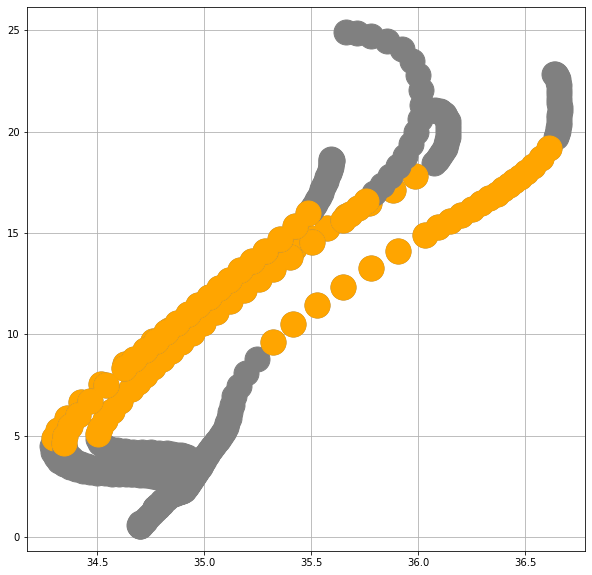

In [37]:
naw_cw_ind   = np.where((naw_mean_den<=31) & (naw_mean_den>=26.5))
wsaw_cw_ind  = np.where((wsaw_mean_den<=31) & (wsaw_mean_den>=26.5))
esaw_cw_ind  = np.where((esaw_mean_den<=31) & (esaw_mean_den>=26.5))
esaw2_cw_ind = np.where((esaw2_mean_den<=31) & (esaw2_mean_den>=26.5))




plt.figure(figsize=(10,10))
plt.plot(naw_mean_sal,naw_mean_temp,'.',markersize=50,color='grey')
plt.plot(naw_mean_sal[naw_cw_ind],naw_mean_temp[naw_cw_ind],'.',color='orange',markersize=50)

plt.plot(wsaw_mean_sal,wsaw_mean_temp,'.',markersize=50,color='grey')
plt.plot(wsaw_mean_sal[wsaw_cw_ind],wsaw_mean_temp[wsaw_cw_ind],'.',color='orange',markersize=50)

plt.plot(esaw_mean_sal,esaw_mean_temp,'.',markersize=50,color='grey')
plt.plot(esaw_mean_sal[esaw_cw_ind],esaw_mean_temp[esaw_cw_ind],'.',color='orange',markersize=50)

plt.plot(esaw2_mean_sal,esaw2_mean_temp,'.',markersize=50,color='grey')
plt.plot(esaw2_mean_sal[esaw2_cw_ind],esaw2_mean_temp[esaw2_cw_ind],'.',color='orange',markersize=50)


plt.grid()

In [38]:
print('NAW CW Definitions: T =',np.nanmean(naw_mean_temp[naw_cw_ind]),'S =',np.nanmean(naw_mean_sal[naw_cw_ind]),'O2 =',np.nanmean(naw_mean_oxy[naw_cw_ind]))
print('WSAW CW Definitions: T =',np.nanmean(wsaw_mean_temp[wsaw_cw_ind]),'S =',np.nanmean(wsaw_mean_sal[wsaw_cw_ind]),'O2 =',np.nanmean(wsaw_mean_oxy[wsaw_cw_ind]))
print('ESAW CW Definitions: T =',np.nanmean(esaw_mean_temp[esaw_cw_ind]),'S =',np.nanmean(esaw_mean_sal[esaw_cw_ind]),'O2 =',np.nanmean(esaw_mean_oxy[esaw_cw_ind]))
print('ESAW2 CW Definitions: T =',np.nanmean(esaw2_mean_temp[esaw2_cw_ind]),'S =',np.nanmean(esaw2_mean_sal[esaw2_cw_ind]),'O2 =',np.nanmean(esaw2_mean_oxy[esaw2_cw_ind]))


NAW CW Definitions: T = 15.592837 S = 36.14963 O2 = 195.08525
WSAW CW Definitions: T = 11.65809 S = 35.085278 O2 = 217.84663
ESAW CW Definitions: T = 10.499286 S = 35.02778 O2 = 86.65523
ESAW2 CW Definitions: T = 10.357459 S = 34.870228 O2 = 204.76808


## Potential Vorticity

In [43]:
#naw_temp_ds = temp_ds.sel(lat=slice(min_lat,max_lat),lon=slice(min_lon,max_lon),time=temp_ds.time[0])
#naw_sal_ds  = sal_ds.sel(lat=slice(min_lat,max_lat),lon=slice(min_lon,max_lon),time=sal_ds.time[0])
#naw_den_ds  = den_ds.sel(lat=slice(min_lat,max_lat),lon=slice(min_lon,max_lon),time=sal_ds.time[0])
naw_temp_ds.t_an[:,0,0]

#sw.geostrophic.bfrq(naw_mean_temp,naw_mean_sal,)

<xarray.DataArray 't_an' (depth: 102)>
array([26.01309 , 25.98451 , 25.94589 , 25.88639 , 25.805   , 25.6818  ,
       25.52791 , 25.31889 , 25.08539 , 24.84099 , 24.59931 , 24.36261 ,
       24.123291, 23.8989  , 23.67539 , 23.4605  , 23.25559 , 23.050291,
       22.85429 , 22.66211 , 22.46941 , 21.58179 , 20.75531 , 20.04871 ,
       19.46839 , 19.0124  , 18.67791 , 18.422909, 18.205109, 18.0235  ,
       17.8432  , 17.65329 , 17.430191, 17.17961 , 16.876291, 16.51681 ,
       16.09929 , 15.136991, 14.0609  , 12.976391, 11.87049 , 10.82891 ,
        9.733991,  8.79031 ,  7.9909  ,  7.34449 ,  6.79591 ,  6.29519 ,
        5.91189 ,  5.6029  ,  5.34149 ,  5.1115  ,  4.92681 ,  4.7583  ,
        4.60171 ,  4.4689  ,  4.35871 ,  4.26711 ,  4.17691 ,  4.09079 ,
        4.01161 ,  3.94751 ,  3.88251 ,  3.81439 ,  3.7544  ,  3.6876  ,
        3.62919 ,  3.5178  ,  3.41051 ,  3.3102  ,  3.21529 ,  3.12521 ,
        3.04171 ,  2.96161 ,  2.88659 ,  2.81609 ,  2.75081 ,  2.68739 ,
        2.62701 ,  2.56941 ,  2.51831 ,  2.47331 ,  2.43609 ,  2.40251 ,
        2.37651 ,  2.3558  ,  2.33951 ,  2.32679 ,  2.31761 ,  2.31011 ,
        2.30341 ,  2.29651 ,  2.2896  ,  2.28001 ,  2.26541 ,  2.24771 ,
        2.2274  ,  2.2051  ,  2.18201 ,  2.15321 ,  2.12801 ,  2.0944  ],
      dtype=float32)
Coordinates:
    lat      float32 25.5
    lon      float32 -69.5
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
    time     float32 4.326e+03
Attributes:
    standard_name:  sea_water_temperature
    long_name:      Objectively analyzed mean fields for sea_water_temperatur...
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    units:          degrees_celsius

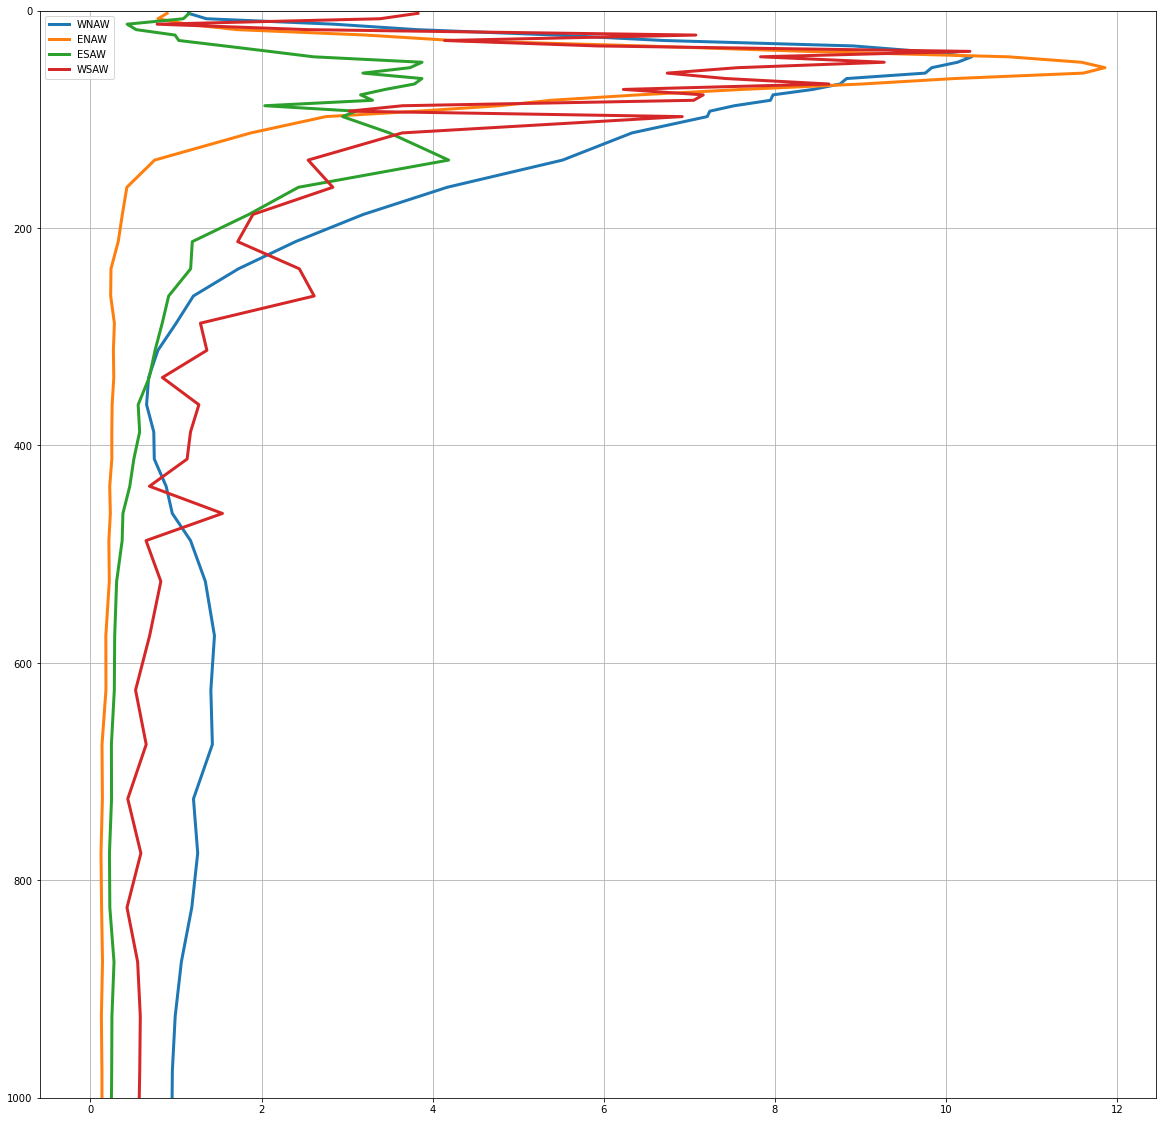

In [193]:
wnaw_n2, wnaw_q, wnaw_p_ave = sw.geostrophic.bfrq(naw_sal_ds.s_an[:,0,0].values,naw_temp_ds.t_an[:,0,0].values,naw_temp_ds.depth.values,naw_temp_ds.lat.values[0])
enaw_n2, enaw_q, enaw_p_ave = sw.geostrophic.bfrq(enaw_sal_ds.s_an[:,0,0].values,enaw_temp_ds.t_an[:,0,0].values,enaw_temp_ds.depth.values,enaw_temp_ds.lat.values[0])
esaw_n2, esaw_q, esaw_p_ave = sw.geostrophic.bfrq(esaw_sal_ds.s_an[:,0,0].values,esaw_temp_ds.t_an[:,0,0].values,esaw_temp_ds.depth.values,esaw_temp_ds.lat.values[0])
wsaw_n2, wsaw_q, wsaw_p_ave = sw.geostrophic.bfrq(wsaw_sal_ds.s_an[:,0,0].values,wsaw_temp_ds.t_an[:,0,0].values,wsaw_temp_ds.depth.values,wsaw_temp_ds.lat.values[0])

mult = 10**10

plt.figure(figsize=(20,20))
plt.plot(mult*wnaw_q,wnaw_p_ave,label='WNAW',linewidth=3)
plt.plot(mult*enaw_q,enaw_p_ave,label='ENAW',linewidth=3)
plt.plot(mult*np.abs(esaw_q),esaw_p_ave,label='ESAW',linewidth=3)
plt.plot(mult*np.abs(wsaw_q),wsaw_p_ave,label='WSAW',linewidth=3)
plt.ylim(1000,0)
plt.legend()
plt.grid()

## Take some N-S slices and look at properties, then calculate PV along these lines

In [127]:
wna_oxy_line  = oxy_ds.sel(lat=slice(10,45),lon=-64.5,time=oxy_ds.time[0])
wna_temp_line = temp_ds.sel(lat=slice(10,45),lon=-64.5,time=temp_ds.time[0])
wna_sal_line  = sal_ds.sel(lat=slice(10,45),lon=-64.5,time=sal_ds.time[0])
wna_den_line  = den_ds.sel(lat=slice(10,45),lon=-64.5,time=den_ds.time[0])

na_oxy_line  = oxy_ds.sel(lat=slice(-45,45),lon=-40.5,time=oxy_ds.time[0])
na_temp_line = temp_ds.sel(lat=slice(-45,45),lon=-40.5,time=temp_ds.time[0])
na_sal_line  = sal_ds.sel(lat=slice(-45,45),lon=-40.5,time=sal_ds.time[0])
na_den_line  = den_ds.sel(lat=slice(-45,45),lon=-40.5,time=den_ds.time[0])

esa_oxy_line  = oxy_ds.sel(lat=slice(-45,5),lon=0.5,time=oxy_ds.time[0])
esa_temp_line = temp_ds.sel(lat=slice(-45,5),lon=0.5,time=temp_ds.time[0])
esa_sal_line  = sal_ds.sel(lat=slice(-45,5),lon=0.5,time=sal_ds.time[0])
esa_den_line  = den_ds.sel(lat=slice(-45,5),lon=0.5,time=den_ds.time[0])



In [164]:

def potential_vorticity_transect(temp_df,sal_df):
    temp_df = na_temp_line
    sal_df = na_sal_line
    nrows = len(temp_df.depth)-1
    ncols = len(temp_df.lat)
    q_matrix = np.empty((nrows,ncols))
    q_matrix[:] = np.nan
    p_ave_matrix = np.empty((nrows,ncols))
    p_ave_matrix[:] = np.nan

    for x in np.arange(0,ncols):
        q_matrix[:,x] = sw.geostrophic.bfrq(sal_df.s_an[:,x],temp_df.t_an[:,x],temp_df.depth,temp_df.lat[x])[1].transpose()
        p_ave_matrix[:,x] = sw.geostrophic.bfrq(sal_df.s_an[:,x],temp_df.t_an[:,x],temp_df.depth,temp_df.lat[x])[2].transpose()

    return q_matrix, p_ave_matrix

na_q_line, na_p_ave_line = potential_vorticity_transect(na_temp_line,na_sal_line)
wna_q_line, wna_p_ave_line = potential_vorticity_transect(wna_temp_line,wna_sal_line)
esa_q_line, esa_p_ave_line = potential_vorticity_transect(esa_temp_line,esa_sal_line)

/Users/joegradone/opt/anaconda3/envs/glider/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


Text(0.5, 0, 'Depth')

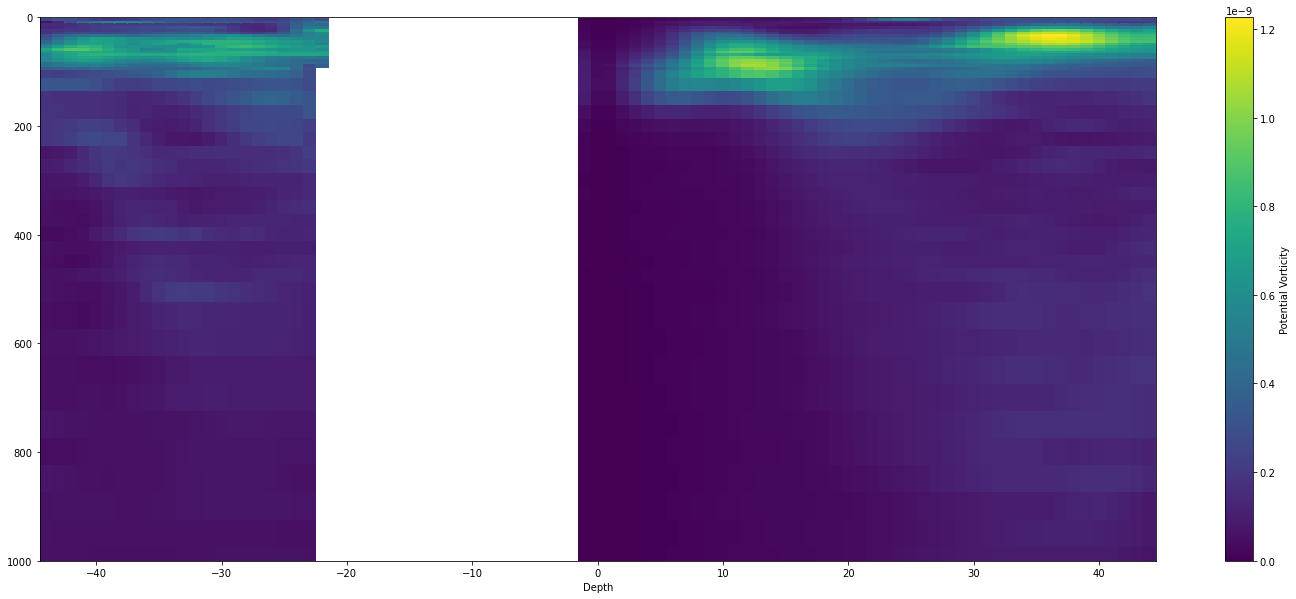

In [195]:
plt.figure(figsize=(25,10))
plt.pcolormesh(na_temp_line.lat,na_p_ave_line,np.abs(na_q_line))
plt.ylim(1000,0)
plt.colorbar(label='Potential Vorticity')
plt.xlabel('Latitude')
plt.xlabel('Depth')

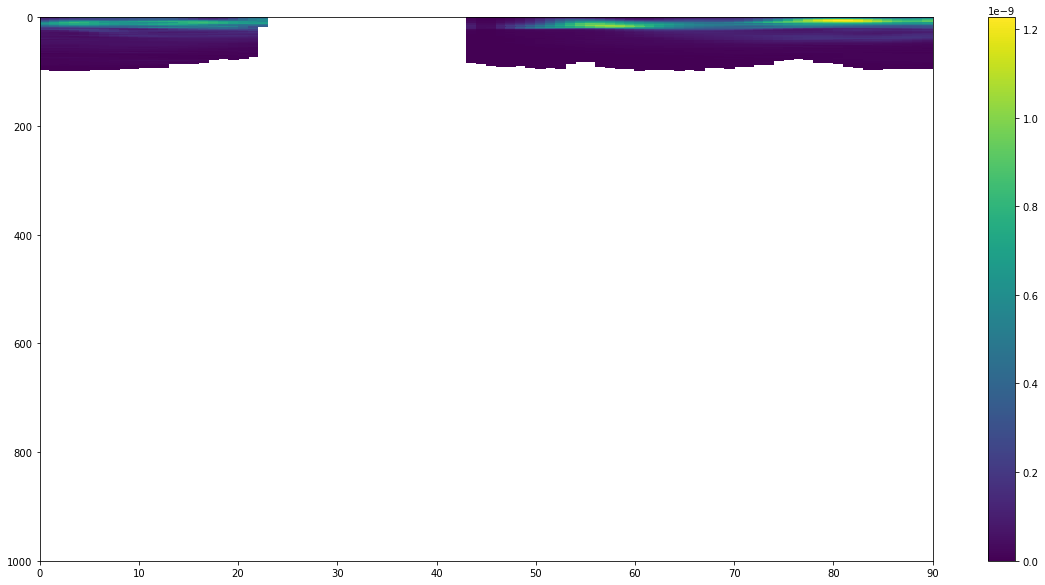

In [179]:
plt.figure(figsize=(20,10))
plt.pcolormesh(np.abs(wna_q_line))
plt.ylim(1000,0)
plt.colorbar()

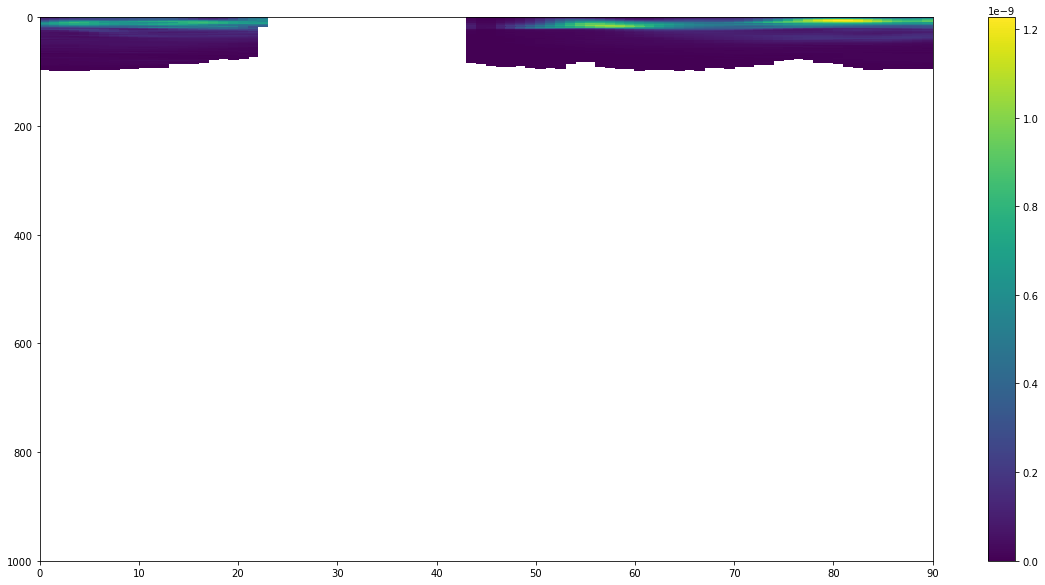

In [180]:
plt.figure(figsize=(20,10))
plt.pcolormesh(np.abs(esa_q_line))
plt.ylim(1000,0)
plt.colorbar()

In [167]:
wna_p_ave_line

array([[2.50e+00, 2.50e+00, 2.50e+00, ..., 2.50e+00, 2.50e+00, 2.50e+00],
       [7.50e+00, 7.50e+00, 7.50e+00, ..., 7.50e+00, 7.50e+00, 7.50e+00],
       [1.25e+01, 1.25e+01, 1.25e+01, ..., 1.25e+01, 1.25e+01, 1.25e+01],
       ...,
       [5.25e+03, 5.25e+03, 5.25e+03, ..., 5.25e+03, 5.25e+03, 5.25e+03],
       [5.35e+03, 5.35e+03, 5.35e+03, ..., 5.35e+03, 5.35e+03, 5.35e+03],
       [5.45e+03, 5.45e+03, 5.45e+03, ..., 5.45e+03, 5.45e+03, 5.45e+03]])

In [168]:
na_p_ave_line

array([[2.50e+00, 2.50e+00, 2.50e+00, ..., 2.50e+00, 2.50e+00, 2.50e+00],
       [7.50e+00, 7.50e+00, 7.50e+00, ..., 7.50e+00, 7.50e+00, 7.50e+00],
       [1.25e+01, 1.25e+01, 1.25e+01, ..., 1.25e+01, 1.25e+01, 1.25e+01],
       ...,
       [5.25e+03, 5.25e+03, 5.25e+03, ..., 5.25e+03, 5.25e+03, 5.25e+03],
       [5.35e+03, 5.35e+03, 5.35e+03, ..., 5.35e+03, 5.35e+03, 5.35e+03],
       [5.45e+03, 5.45e+03, 5.45e+03, ..., 5.45e+03, 5.45e+03, 5.45e+03]])

In [171]:
wna_q_line

array([[-2.52472404e-10, -3.17757348e-10, -2.90603402e-10, ...,
         2.74117146e-10,  2.48007587e-10,  2.23122409e-10],
       [-6.12793843e-11, -1.27583291e-10, -2.74061773e-10, ...,
         2.07949047e-10,  2.26335062e-10,  2.79513329e-10],
       [-1.51972490e-10, -1.49247795e-10, -1.58293004e-10, ...,
         3.52091745e-10,  3.80431131e-10,  4.11908757e-10],
       ...,
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan]])